### ML - Final 2018 Beau

## Question 1 (10 points)

Generate 200 2D points from each of 3 Guassians with distributions shaped roughly as shown in the diagram below. Plot the resulting 600 points with different colors for each Gaussian.

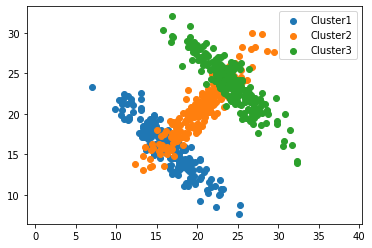

In [1]:
import numpy as np
means = [[16, 16],[20,20],[24,24]]
cov1 = [[10, -9], [-9, 10]] 
cov2 = [[10,9],[9,10]]
cov3 = [[10, -9], [-9, 10]] 
import matplotlib.pyplot as plt
x1= np.random.multivariate_normal(means[0], cov1, 200).T
x2 = np.random.multivariate_normal(means[1], cov2, 200).T
x3 = np.random.multivariate_normal(means[2], cov3, 200).T

plt.scatter(x1[0,:], x1[1,:], label = 'Cluster1')
plt.scatter(x2[0,:], x2[1,:],label = 'Cluster2')
plt.scatter(x3[0,:], x3[1,:],label = 'Cluster3')
plt.xlim(5,35)
plt.legend()
plt.axis('equal')
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Ground truth means and covariances for the data we'll generate

means_gt = [ [16,16], [20,20], [24,24] ]
sigmas_gt = [ np.matrix([[10, -9],[-9, 10]]), np.matrix([[10,9],[9,10]]),
              np.matrix([[10,-9],[-9,10]]) ]

# Ground truth Prior probability (phi_j) for each cluster

phi_gt = [ 1/3, 1/3, 1/3 ]

# For more interesting covariances, you can also try, for example,
# [[11.31371, -0.70711],[11.31371, 0.70711]] or
# [[11.31371, 0.70711],[-11.31371, 0.70711]].

# Size of dataset

m = 600

# number of variables

n = len(means_gt[0])

# k number of clusters/outcomes

k = len(phi_gt)

# Ground truth indices of cluster identities

Z = [0]*m
# print(Z)


# Generate a new k-means dataset

def gen_dataset():
    X = np.zeros((m,n))
    # Generate m samples from multinomial distribution using phi_gt
    #throw one time, probability of getting 0 is 0.2, 1 = 0.2, 2 = 0.6
    z_vectors = np.random.multinomial(1, phi_gt, size=m)  # Result: binary matrix of size (m x k) 
#     print('z',z_vectors)
    for i in range(m):
        # Convert one-hot representation z_vectors[i,:] to an index
        Z[i] = np.where(z_vectors[i,:] == 1)[0][0]
        # Grab ground truth mean mu_{z^i}
        mu = means_gt[Z[i]]                
        # Grab ground truth covariance Sigma_{z^i}
        sigma = sigmas_gt[Z[i]]
        # Sample a 2D point from mu, sigma
        X[i,:] = np.random.multivariate_normal(mu,sigma,1)
    return X


X = gen_dataset()
#labels = Z
# print(Z)
#one hot  = z_vectors

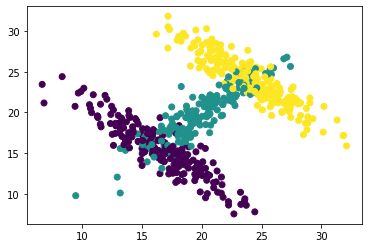

In [2]:
plt.scatter(X[:,0],X[:,1],c = Z)
plt.show()

## Question 2 (10 points)

Fit a k-means model with k=3 to the data from Question 1. Plot the data with different colors indicating which cluster they are assigned to. Discuss whether it is a good model and why it is or is not good.

In [2]:
X = np.concatenate((x1,x2),axis = 1)
X = np.concatenate((X,x3),axis = 1).T
print(X.shape)

(600, 2)


In [3]:
def init_kmeans(X, k):
    m = X.shape[0]
    n = X.shape[1]
    means = np.zeros((k,n))
    order = np.random.permutation(m)[:k] #only the first k samples
    for i in range(k):
        means[i,:] = X[order[i],:]
    return means

In [4]:
def iterate_kmeans(X, means):
    m = X.shape[0]
    n = X.shape[1]
    k = means.shape[0]
    distortion = np.zeros(m)
    c = np.zeros(m)
    for i in range(m):
        min_j = 0
        min_dist = 0
        for j in range(k):
            dist_j = np.linalg.norm(X[i,:] - means[j,:])
#             print('dist j ',dist_j)
            if dist_j < min_dist or j == 0:
                min_dist = dist_j
                min_j = j
#                 print(j)
        distortion[i] = min_dist
        c[i] = min_j
    for j in range(k):
        means[j,:] = np.zeros((1,n))
        nj = 0
        for i in range(m):
            if c[i] == j:
                nj = nj + 1
                means[j,:] = means[j,:] + X[i,:]
        if nj > 0:
            means[j,:] = means[j,:] / nj
    return means, c, np.sum(distortion)

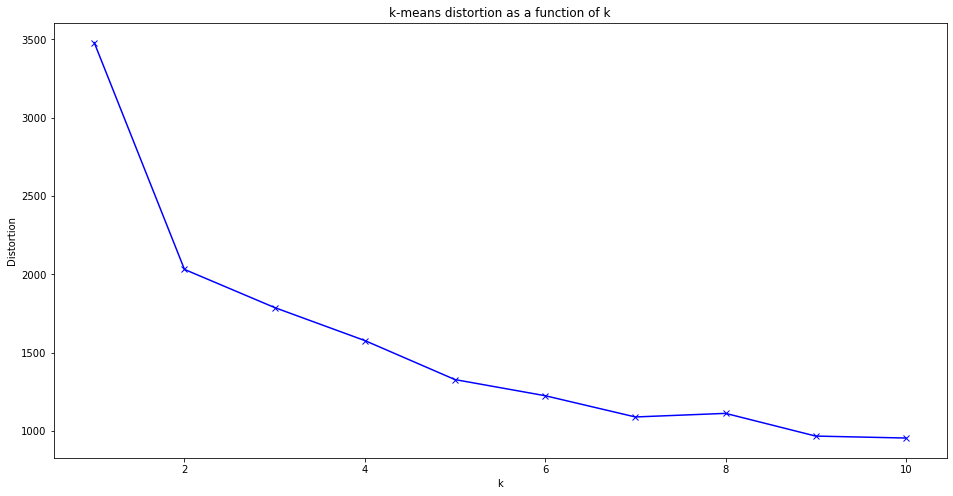

In [5]:
# Intialize hyperparameters

max_k = 10
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)

distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    means = init_kmeans(X, k)
    prev_distortion = 0
    while True:
        means, c, distortion = iterate_kmeans(X, means)
#         print('c ',c)
        if prev_distortion > 0 and prev_distortion - distortion < epsilon:
            break
        prev_distortion = distortion
    distortions[k-1] = distortion
## WHAT IS c?
# Plot distortion as function of k

plt.figure(figsize=(16,8))  
plt.plot(range(1,max_k+1), distortions, 'bx-')
# plt.plot(range(1,max_k+1), distortion_k, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()


In [6]:
# Re-run k-means with k=3
epsilon = 0.001
iters = 30
k = 3
means = init_kmeans(X, k)
prev_distortion = 0
while True:
    means, c, distortion = iterate_kmeans(X, means)
    if prev_distortion > 0 and prev_distortion - distortion < epsilon:
        break
    prev_distortion = distortion
    

In [7]:
print('===== means =====')
print(means)
print('===== c =====')
# print(c)

===== means =====
[[19.13309569 13.0551572 ]
 [23.53243686 23.35591464]
 [15.71065481 17.78382857]]
===== c =====


In [8]:
# Set labels in dataset to cluster IDs according to k-means model.

clusters = c

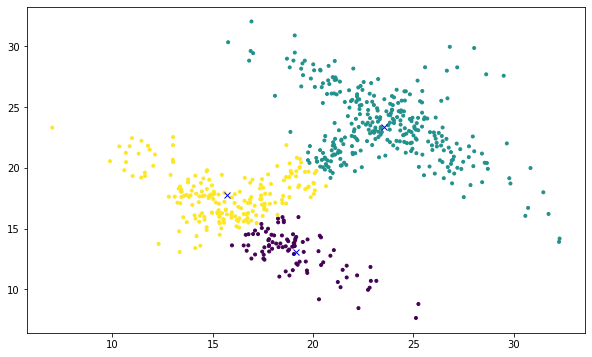

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],marker=".",c=clusters,cmap='viridis');
plt.plot(means[0][0], means[0][1],'bx',means[1][0], means[1][1],'bx', means[2][0], means[2][1],'bx')

## Question 3 (20 points)

Fit a GMM with k=3 to the data from Question 1. Plot the data with different colors indicating which Gaussian component they are assigned to. Discuss whether it is a good model and why it is or is not good, in comparison to the k-means model.


In [10]:
phi_gt = [ 1/3, 1/3, 1/3 ]

In [11]:
def init_gmm(X, k):
    m = X.shape[0]
    n = X.shape[1]
    Mu = np.zeros((n,k))
    Sigma = np.zeros((k,n,n))
    Phi = np.zeros(k)
    order = np.random.permutation(m)
    for j in range(k):
        # Initially assign equal probability to each cluster/outcome
        Phi[j] = 1/k      
        # Ramdomly assign mean to one of the data points       
        Mu[:,j] = X[order[j],:].T
        # Initial covariance is identity matrix
        Sigma[j,:,:] = np.eye(n)    
    return Phi, Mu, Sigma


def Gaussian(X, mean, covariance):
    k = len(mean)
    X = X - mean.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(covariance)**0.5)) * np.exp(-0.5 * np.sum(X @ np.linalg.pinv(covariance) * X, axis=1))
    return p


# Run one iteration of EM

def iterate_em_gmm(X, threshold, Phi, Mu, Sigma):
    m = X.shape[0]
    n = X.shape[1]
    k = len(Phi)
    threshold = np.reshape(np.repeat(threshold, n*k), (n,k))
    pj_arr = np.zeros((m,k))
    
    # E-step: calculate w_j^i
    W = np.zeros((m, k))
    for j in range(k):
        pj = Gaussian(X, Mu[:,j], Sigma[j,:,:])
        pj_arr[0:m,j] = pj
        W[:,j] = Phi[j] * pj

    # W tells us what is the relative weight of each cluster for each data point
    W[:,:] = W * np.tile(1/np.sum(W,1),(k,1)).T

    # M-step: adjust mean and sigma
    Phi[:] = sum(W) / m
    Mu_previous = Mu.copy()
    for j in range(k):
        # Split cluster specific W for each dimension
        Wj = np.tile(W[:,j],(2,1)).T
        # Compute Mu for each variable for each cluster
        Mu[:,j] = sum(X * Wj)/sum(Wj)
        Muj = np.tile(Mu[:,j],(m,1))
        Sigma[j,:,:] = np.matmul((X - Muj).T, (X - Muj) * Wj) / sum(W[:,j])

    if (abs(Mu-Mu_previous) <= threshold).all():
        converged = True
    else:
        converged = False

    labels = np.argmax(pj_arr, axis = 1)
    pj = pj_arr[np.arange(0,m,1),labels]
    X_label = np.insert(X, 2, labels, axis=1)
    return converged, pj, X_label


In [12]:
threshold = np.matrix(.01)

Phi, Mu, Sigma = init_gmm(X, k)

converged = False
while not converged:
    converged, pj, X_label = iterate_em_gmm(X, threshold, Phi, Mu, Sigma)

In [13]:
print(X_label.shape)
# print(X_label[:,2])
# print(converged)
# print(pj)

(600, 3)


In [14]:
print("======== Phi =========")
print(Phi)
print(phi_gt)
print("======== Mu =========")
print(Mu.T)
print(means)
print("======== Sigma =========")
print(Sigma)
print(cov1,cov2,cov3)


======== Phi =========
[0.32956026 0.31977737 0.35066236]
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
======== Mu =========
[[20.61995988 20.76728752]
 [24.10794294 23.69673159]
 [16.42771373 15.7749683 ]]
[[19.13309569 13.0551572 ]
 [23.53243686 23.35591464]
 [15.71065481 17.78382857]]
======== Sigma =========
[[[ 9.7604419   9.44759815]
  [ 9.44759815 10.71186911]]

 [[ 9.67630373 -8.9279221 ]
  [-8.9279221   9.93546811]]

 [[ 9.01967994 -8.01750933]
  [-8.01750933  8.86561944]]]
[[10, -9], [-9, 10]] [[10, 9], [9, 10]] [[10, -9], [-9, 10]]


In [15]:
# outlier_prob = .01
# outliers = np.nonzero(pj < outlier_prob)[0]
# print(outliers)

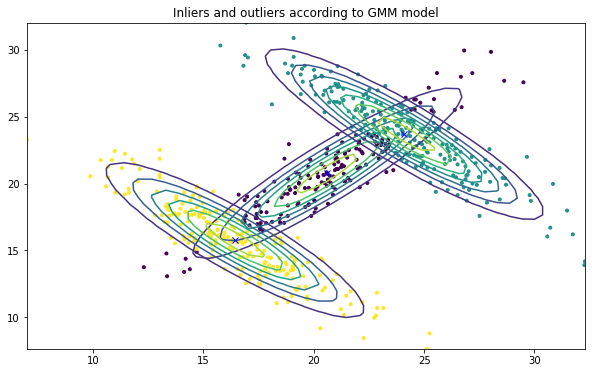

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],marker=".",c=X_label[:,2],cmap='viridis');
# plt.scatter(X[outliers,0],X[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);
plt.plot(Mu[0,0], Mu[1,0],'bx',Mu[0,1], Mu[1,1],'bx', Mu[0,2], Mu[1,2],'bx')

for c in np.arange(0,k):    
    X_class = X[np.where(X_label[:,2] == c)[0],:]
    xlist = np.linspace(min(X_class[:,0]), max(X_class[:,0]), 30)
    ylist = np.linspace(min(X_class[:,1]), max(X_class[:,1]), 30)
    
    XX, YY = np.meshgrid(xlist, ylist)
    Z = np.zeros(XX.shape)
    i = 0
    while i < XX.shape[0]:
        j = 0
        while j < XX.shape[0]:
            pt = np.array([[XX[i,j], YY[i,j]]])
            Z[i,j] = Gaussian(pt, Mu[:,c], Sigma[c])[0]
            j = j + 1
        i = i + 1    
    cp = plt.contour(XX, YY, Z)
plt.title('Inliers and outliers according to GMM model')
plt.show()

In [17]:
# # Do the animation. This code is based on
# # http://tiao.io/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
# from matplotlib import animation, rc
# from IPython.display import HTML
# # First set up the figure, the axis, and the plot element we want to animate
# fig, ax = plt.subplots()

# ax.set_xlim((min(X[:,0]), max(X[:,0])))
# ax.set_ylim((min(X[:,1]), max(X[:,1])))

# points, = ax.plot(X[:,0], X[:,1], 'bo')
# means = [None]*k
# for j in range(k):
#     means[j], = ax.plot(Mu[0,j], Mu[1,j], 'rx')

# # Function to plot the kmeans data
# def replot():
#     points.set_data(X[:,0], X[:,1])
#     for j in range(k):
#         means[j].set_data(Mu[0,j], Mu[1,j])

# # initialization function: plot the background of each frame
# def init():
#     #gen_dataset()
#     init_gmm(X,k)
#     replot()
#     return ([points]+means)

# # animation function. This is called sequentially
# def animate(i):
#     iterate_em_gmm(X, threshold, Phi, Mu, Sigma)
#     replot()
#     return ([points]+means)

# # call the animator. blit=True means only re-draw the parts that have changed.
# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                frames=100, interval=1000, blit=True)

# HTML(anim.to_html5_video())

## Question 4 (10 points)

Compare the Euclidean distortion for the 3 means learned by your k-means model in Question 2 and the 3 means learned by your GMM in Question 3. (By Euclidean distortion, we mean the sum squared Euclidean distance of the data points to their nearest means.) Which of the distortion values is lower?  Is the model with the lower Euclidean distortion the better model?  Why or why not?

In [18]:
# k-means
print(means)
# print(means[0][1])
dist1_k = np.linalg.norm(X[clusters == 0] - means[2])/200
dist2_k = np.linalg.norm(X[clusters == 2] - means[0])/200
dist3_k = np.linalg.norm(X[clusters == 1] - means[1])/200
dist_k = np.array((dist1_k,dist2_k,dist3_k))
print(f"average eucl. distance for k-means model: ",dist_k)

Mu_pl = Mu.T
print(Mu_pl)
dist1_g = np.linalg.norm(X[clusters == 0] - Mu_pl[2])/200
dist2_g = np.linalg.norm(X[clusters == 2] - Mu_pl[0])/200
dist3_g = np.linalg.norm(X[clusters == 1] - Mu_pl[1])/200
dist_g = np.array((dist1_g,dist2_g,dist3_g))
print(f"average eucl. distance for gmm model: ",dist_g)

[[19.13309569 13.0551572 ]
 [23.53243686 23.35591464]
 [15.71065481 17.78382857]]
average eucl. distance for k-means model:  [0.30175613 0.46799593 0.3576045 ]
[[20.61995988 20.76728752]
 [24.10794294 23.69673159]
 [16.42771373 15.7749683 ]]
average eucl. distance for gmm model:  [0.21795315 0.46223861 0.36241971]


## Question 5 (10 points)

Using the GMM model from Question 3, generate a LABELED dataset consisting of 200 points from each of the Gaussians, with the label of each point being the index of the Gaussian that generated it (1, 2, or 3).  Plot the data using different colors for the three components.

In [19]:
# print(X_label)
X_label_v1 = X_label

X_label_v1[:,2] = X_label[:,2] + 1
print(X_label)

[[20.29347973  9.18194367  3.        ]
 [17.8058806  13.63571477  3.        ]
 [14.45737226 18.04628079  3.        ]
 ...
 [24.54395609 22.12587243  2.        ]
 [23.34355129 24.15391382  2.        ]
 [30.58205301 16.04437753  2.        ]]


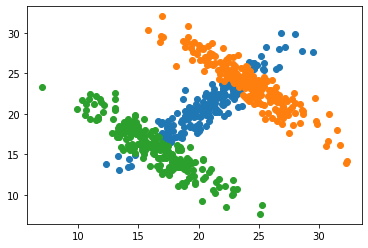

In [20]:
plt.scatter(X_label_v1[X_label[:,2]==1,0],X_label_v1[X_label[:,2]==1,1])
plt.scatter(X_label_v1[X_label[:,2]==2,0],X_label_v1[X_label[:,2]==2,1])
plt.scatter(X_label_v1[X_label[:,2]==3,0],X_label_v1[X_label[:,2]==3,1])
plt.show()

## Question 6 (30 points)

Split the data from Question 5 into a training set and validation set. Place 80% of the data in the training set and 20% of the data in the test set.  Fit a neural network to the training data. The model should have a single hidden ReLU hidden layer and a 3-output softmax layer with cross entropy loss function.  Build two models: one with a single unit in the hidden layer, and one with a sufficient number of units in the hidden layer to provide good classification results on both the training and validation sets. For the model with multiple hidden units, plot the loss on the training set and validation set as a function of training epoch.  Analyze the loss curves: do you see evidence of overtraining?  If so, how should you deal with it? If not, why not, and how can you be sure you're obtaining the best 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import copy

def convert_to_one_hot(y):
    y_vect = np.zeros((len(y), len(np.unique(y))))
    for i in range(0,len(y)):
        y_vect[i, int(y[i])-1] = 1
    return y_vect

# Convert target indices to one-hot representation

print(np.unique(X_label_v1[:,2]))
y_indices = X_label_v1[:,2]
y = convert_to_one_hot(y_indices)
X = np.matrix(X_label_v1[:,:2])
M = X.shape[0]
N = X.shape[1]
print(M,N)
print(y.shape)
print(y)

[1. 2. 3.]
600 2
(600, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [22]:
import random
import warnings
warnings.filterwarnings("ignore")

# Normalize each input feature

def normalize(X):
    M = X.shape[0]
    XX = X - np.tile(np.mean(X,0),[M,1])
    XX = np.divide(XX, np.tile(np.std(XX,0),[M,1]))
    return np.nan_to_num(XX, copy=True,nan=0.0)

XX = normalize(X)

idx = np.arange(0,M)

# Partion data into training and testing dataset

random.shuffle(idx)
percent_train = .8
m_train = int(M * percent_train)
m_test = M - m_train
train_idx = idx[0:m_train]
test_idx = idx[m_train:M+1]
X_train = XX[train_idx,:];
X_test = XX[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];
y_test_indices = y_indices[test_idx]

print("========== train shape ==========")
print(X_train.shape,y_train.shape)
print("========== test shape ==========")
print(X_test.shape,y_test.shape)

========== train shape ==========
(480, 2) (480, 3)
========== test shape ==========
(120, 2) (120, 3)


In [23]:
# Let's start with a 3-layer network with sigmoid activation functions,
# 6 units in layer 1, and 5 units in layer 2.

h1 = 6

W = [[], np.random.normal(0,0.1,[N,h1]),
         np.random.normal(0,0.1,[h1,3])]
b = [[], np.random.normal(0,0.1,[h1,1]),
         np.random.normal(0,0.1,[3,1])]
L = len(W)-1


In [24]:
def sigmoid_act(z):
    return 1/(1+np.exp(-z))

def softmax_act(z):
    exps = np.exp(z)
    return exps / np.sum(exps)

def sigmoid_actder(z):
    az = sigmoid_act(z)
    prod = np.multiply(az,1-az)
    return prod

def tanh_act(z):
    return np.tanh(z)

def tanh_actder(z):
    az = act(z)
    prod = np.multiply(az,az)
    return (1 - prod)

def relu_act(z):
    return np.maximum(0,z)

def relu_actder(z):
    z[z<=0] = 0
    z[z>0] = 1
    return z


In [25]:
def ff(x,W,b):
    L = len(W)-1
    a = x
    for l in range(1,L+1):
        z = W[l].T*a+b[l]
        if (l == L):
            a = softmax_act(z)
        else:
            a = relu_act(z)
    return a

def loss(y, yhat):
    return - np.dot(y, np.log(yhat))

In [26]:
# Train for 100 epochs with mini-batch size 1

cost_arr = [] 
cost_arr_test = []
best_this_loss = 1e-16
alpha = 0.01
max_iter = 100
iter_stop = 0

for iter in range(0, max_iter):
    loss_this_iter = 0
    loss_this_iter_test = 0
    order = np.random.permutation(m_train)
    order_test = np.random.permutation(m_test)
    for i in range(0, m_train):
        
        # Grab the pattern order[i]
        
        x_this = X_train[order[i],:].T
        y_this = y_train[order[i],:]

        # Feed forward step
        
        a = [x_this]
        z = [[]]
        delta = [[]]
        dW = [[]]
        db = [[]]
        for l in range(1,L+1):
            z.append(W[l].T*a[l-1]+b[l])
            if (l == L):
                a.append(softmax_act(z[l]))
            else:
                a.append(relu_act(z[l]))
            # Just to give arrays the right shape for the backprop step
            delta.append([]); dW.append([]); db.append([])
            
        loss_this_pattern = loss(y_this, a[L])
        loss_this_iter = loss_this_iter + loss_this_pattern
        
        delta[L] = a[L] - np.matrix(y_this).T
        for l in range(L,0,-1):
            db[l] = delta[l].copy()
            dW[l] = a[l-1] * delta[l].T
            if l > 1:
                # depends on your activation function in th at particular layer 
                # in this case all our activation functions are sigmoid 
                delta[l-1] = np.multiply(relu_actder(z[l-1]), W[l] *
                             delta[l])
                
        # Check delta calculation
        
        if False:
            print('Target: %f' % y_this)
            print('y_hat: %f' % a[L][0,0])
            print(db)
            y_pred = ff(x_this,W,b)
            diff = 1e-3
            W[1][10,0] = W[1][10,0] + diff
            y_pred_db = ff(x_this,W,b)
            L1 = loss(y_this,y_pred)
            L2 = loss(y_this,y_pred_db)
            db_finite_difference = (L2-L1)/diff
            print('Original out %f, perturbed out %f' %
                 (y_pred[0,0], y_pred_db[0,0]))
            print('Theoretical dW %f, calculated db %f' %
                  (dW[1][10,0], db_finite_difference[0,0]))
        
        for l in range(1,L+1):            
            W[l] = W[l] - alpha * dW[l]
            b[l] = b[l] - alpha * db[l]
            
        
    for j in range(0, m_test):

        # Grab the pattern order[j]

        x_this_test = X_test[order_test[j],:].T
        y_this_test = y_test[order_test[j],:]

        # Feed forward step
        a_test = [x_this_test]
        z_test = [[]]
        for l in range(1,L+1):
            z_test.append(W[l].T*a_test[l-1]+b[l])
            if (l == L):
                a_test.append(softmax_act(z_test[l]))
            else:
                a_test.append(relu_act(z_test[l]))
        
        loss_this_pattern_test = loss(y_this_test,a_test[L])
        loss_this_iter_test = loss_this_iter_test + loss_this_pattern_test
            
        # Backprop step. Note that derivative of multinomial cross entropy
        # loss is the same as that of binary cross entropy loss. See
        # https://levelup.gitconnected.com/killer-combo-softmax-and-cross-entropy-5907442f60ba
        # for a nice derivation.


    cost_arr.append(loss_this_iter[0,0])
    cost_arr_test.append(loss_this_iter_test[0,0])
    
    if loss_this_iter_test < best_this_loss:
        w_best = copy.deepcopy(w)
        b_best = copy.deepcopy(b)
        iter_best = iter
        print('Early stopping at Epoch %d' % (iter))
        break
    
#     tol = 0.0001
#     if len(cost_arr_test) > 50:
#         if cost_arr_test[-2] - cost_arr_test[-1] < tol:
#             iter_stop = iter
#             print('Epoch %d train loss %f' % (iter, loss_this_iter))
#             print('Epoch %d test loss %f' % (iter, loss_this_iter_test))
#             print('Iter stop: ', iter_stop)
#             break

    print('Epoch %d train loss %f' % (iter, loss_this_iter))
    print('Epoch %d test loss %f' % (iter, loss_this_iter_test))
    iter_stop = iter


Epoch 0 train loss 503.653957
Epoch 0 test loss 113.356626
Epoch 1 train loss 354.853200
Epoch 1 test loss 74.081745
Epoch 2 train loss 259.643438
Epoch 2 test loss 63.584486
Epoch 3 train loss 227.581359
Epoch 3 test loss 56.629283
Epoch 4 train loss 207.386691
Epoch 4 test loss 51.772276
Epoch 5 train loss 192.328137
Epoch 5 test loss 49.201529
Epoch 6 train loss 184.411040
Epoch 6 test loss 47.211408
Epoch 7 train loss 178.531556
Epoch 7 test loss 45.804141
Epoch 8 train loss 172.581726
Epoch 8 test loss 44.785707
Epoch 9 train loss 166.890204
Epoch 9 test loss 43.620043
Epoch 10 train loss 165.914604
Epoch 10 test loss 43.747285
Epoch 11 train loss 160.186784
Epoch 11 test loss 46.095486
Epoch 12 train loss 160.145938
Epoch 12 test loss 43.087040
Epoch 13 train loss 158.640140
Epoch 13 test loss 41.419088
Epoch 14 train loss 156.791287
Epoch 14 test loss 41.389538
Epoch 15 train loss 155.313612
Epoch 15 test loss 42.505386
Epoch 16 train loss 154.351019
Epoch 16 test loss 41.068089

In [27]:
# Get test set accuracy

def predict_y(W, b, X):
    M = X.shape[0]
    y_pred = np.zeros(M)
    for i in range(X.shape[0]):
        y_pred[i] = np.argmax(ff(X[i,:].T, W, b)) + 1
    return y_pred

y_test_predicted = predict_y(W, b, X_test)

y_correct = y_test_predicted + 1 == y_test_indices
test_accuracy = np.sum(y_correct) / len(y_correct)

print('Test accuracy: %.4f' % (test_accuracy))

Test accuracy: 0.0167


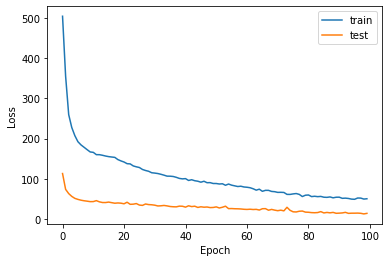

In [28]:
plt.plot(np.arange(0,iter_stop+1,1), cost_arr, label = "train")
plt.plot(np.arange(0,iter_stop+1,1), cost_arr_test, label = "test")

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Question 7 (10 points)

Dicuss whether a linear SVM would be successful at accurately classifying the dataset you created in Question 5. Explain why it would or would not be successful If you think it would not be successful, suggest what type of SVM could accurately classify the dataset, and why it would.

Linear classifier will not be able to classify 3 classes for the data generated. It would probably result in classifying the data into 2 classes seperating green and blue point.

Gaussian RBF kernel could classify the data into three classes with small value for hyperparameter gamma and C as there are overlapping areas where there will be considerable misclassifications